<h1 style="text-align:center;">Project: Simulation of an ideal gas</h1>
<p style="text-align:center;">by Simon Legtenborg, 3773994</p>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import ipywidgets as widgets
from ipycanvas import Canvas, hold_canvas
from time import sleep
from threading import Thread

<h2> Introduction </h2>

<p>Einer der faszinierendsten Themen der Thermodynamik ist das Wechselspiel aus Marko- und Mikrophysik. Deswegen habe ich mir das Ziel gesetzt, eine Simulation zu entwickeln, die ein Gas auf mikroskopischer Ebene simuliert und makroskopische Zustände ausliest. Damit sollen die aus der Vorlesung bereits hergeleiteten Zustandsgleichungen (2. Gay-Lussac'sches Gesetz, Boyle-Mariotte'sches Gesetz, ideale Gasgleichung) sowie die Grundgleichungen der kinetischen Gastheorie (Druck, kinetische Energie, Maxwell-Boltzmann-Verteilung) überprüft und bestätigt werden. 
Die Arbeit bietet außerdem eine interaktive Simulation. </p>

<h2>Fundamentals</h2>

Bevor wir zur Simulation kommen, müssen die Gesetzmäßigkeiten erklärt, die wir im Anschluss überprüfen wollen.

<h3>Zustandsgleichungen</h3>

<p>In der Simulation kann Volumen, Temperatur und Teilchenzahl variiert bzw. konstant gehalten werden. Es bietet sich deshalb an, die Gesetze von Boyle-Marionette und Gay-Lussac (2. Gesetz) zu überprüfen:</p>

<p><b>Boyle Marionette: </b>Wird eine feste Menge eines idealen Gases auf einer konstanten Temperaur gehalten, während Druck und Volumen veränderbar sind, so ist das Volumen indirekt proportional
zum Druck. Es gilt:<br>
$T \hbox{ konst. } \Rightarrow V \propto \frac{1}{p}$
</p>

<p><b>2. Gay-Lussac'sches Gesetz: </b>Wird eine feste Menge eines idealen Gases auf einem konstanten Volumen V gehalten, während sich die Temperatur oder der Druck ändern, so ist der Druck proportional zur Temperatur T. Es gilt:<br>
$V \hbox{ konst. } \Rightarrow p \propto T$</p>

<p>Kombiniert man beide Gesetze, so ergibt sich als allgemeines Gasgesetz: <br>
$\frac{p \cdot V}{T} = \hbox{ konst.}$ <br>
Wird anschließend noch die Teilchenzahl variiert, so ergibt sich die ideale Gasgleichung: <br>
$p \cdot V = N \cdot k_B \cdot T$



<h3> Das Modell des idealen Gases </h3>
Die oben beschriebenen Gesetze setzen voraus, dass mit einem idealen Gas gearbeitet wird. Was ein ideales Gas überhaupt ist, und wir ein Gas in einer Simulation umgesetzt werden kann, wird nun erläutert.

Folgende Annahmen beschreiben das Modell des idealen Gases vollständig:
<ul>
    <li>Atome/Moleküle werden durch kleine starre Kugeln mit Radius $r_0$ approximiert</li>
    <li>N Kugeln existieren in einer Box, Position, Geschwindigkeit, Masse und Radius sind gekannt</li>
    <li>Position und Geschwindigkeit sind statistisch verteilt </li>
    <li>Kugeln interagieren nur durch elastische Stöße mit der Wand oder anderem Teilchen</li>
    <li>$r_0$ ist klein gegenüber mittleren Abstand der Teilchen
</ul>

<table style="color:black;">
  <tr>
    <td>
        <figure>
          <img src="images/video1.gif" alt="Trulli" style="width:100%">
          <figcaption>elastischer Stoß zwischen Kugel und Wand</figcaption>
        </figure>
    </td>
    <td>
        <figure>
          <img src="images/video2.gif" alt="Trulli" style="width:100%">
          <figcaption>elastischer Stoß zwischen zwei Kugeln</figcaption>
        </figure>
    </td>
  </tr>
</table>

<p><b>Mathematik von elastischen Stößen in 1D: </b>Beim idealen elastischen Stoß stoßen zwei Körper aufeinander ohne dass kinetische Energie verloren geht. Es gilt also der Energie- und Impulserhaltungssatz:<br><br>
$
\begin{align*}
   &\sum E_{kin}=\sum E_{kin}'\\
   &\frac{m_1}{2} \cdot v_1^2+\frac{m_2}{2} \cdot v_2^2 = \frac{m_1}{2} \cdot {v_1'}^2
   + \frac{m_2}{2} \cdot {v_2'}^2\\
   &\frac{m_1}{2} \cdot (v_1^2-{v_1'}^2)=\frac{m_2}{2} \cdot ({v_2'}^2-v_2^2)\\\\
   &\sum \vec{p}= \sum \vec{p'}\\
   &m_1 \cdot \vec{v_1}+m_2 \cdot \vec{v_2} = m_1 \cdot \vec{v_1'}
   + m_2 \cdot \vec{v_2'}\\
   &m_1 \cdot (\vec{v_1}-\vec{v_1'})=m_2 \cdot (\vec{v_2'}-\vec{v_2})\\
\end{align*}
$<br>
Durch geeignetes Umstellen (Verweis auf Demtröder) ergibt sich für $v_1'$ und $v_2'$:<br>
    
$
\begin{align*}
    &v_1'=2 \frac{m_1 v_1+m_2 v_2}{m_1 + m_2}-v_1\\
    &v_2'=2 \frac{m_1 v_1+m_2v_2}{m_1+m_2}-v_2
\end{align*}
$
 
    
Für den Fall $m_2 \to \infty$ und $v_2=0$, also eine Wand, gilt:<br>
$
\begin{align*}
    &v_1'=-v_1\\
    &v_2'=0
\end{align*}
$    
</p>

<p><b>Mathematik von Stößen in 2D:</b> Der zweidimensionale elastische Stoß beruht prinzipiell auf dem eindimensionalen Stoß. Für die Berechnung benötigen wir ein geeignetes Koordinatensystem, welches eine Achse senkrecht und eine Achse parallel zur Zentralsteigung besitzt.<br>
**Bild**<br>
Dann gilt für den Stoß:<br>
$
\begin{align*}
&\vec{v_1} =
\begin{pmatrix}
    v_{1x}\\
    v_{1y}
\end{pmatrix},
\vec{v_2} =
\begin{pmatrix}
    v_{2x}\\
    v_{2y}
\end{pmatrix}\\
&\vec{v_1'}=
\begin{pmatrix}
    2 \frac{m_1 v_{1x}+m_2 v_{2x}}{m_1 + m_2}-v_{1x}\\
    v_{1y}
\end{pmatrix}\\
&\vec{v_2'}=
\begin{pmatrix}
    2 \frac{m_1 v_{1x}+m_2 v_{2x}}{m_1 + m_2}-v_{2x}\\
    v_{1y}
\end{pmatrix}
\end{align*}
$
    

<h2>Results and Discussion</h2>

In [6]:
class particle:
    
    
    def rotMat(alpha, x):
        return np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]]).dot(x)
    
    def __init__(self, m, x,y, vx, vy,r):
        self.m = m     #kg
        self.vx = vx   #m/s
        self.vy = vy   #m/s
        self.x = x     #m
        self.y = y     #m
        self.r = r     #m
        self.ratio = 1
    
    def move(self, dt, ratio):
            self.x = self.vx * ratio * dt+ self.x
            self.y = self.vy * ratio * dt + self.y
            self.ratio = ratio
            
    def bounceWall(self,n):
        match n:
            case 0:
                self.vx = -self.vx
                self.x = 2*self.r - self.x
            case 1:
                self.vx = -self.vx
                self.x= 2*(simulation.width.value*10**-12-self.r)-self.x
            case 2:
                self.vy = -self.vy
                self.y = 2*self.r-self.y
            case 3:
                self.vy = -self.vy
                self.y = 2*(simulation.height-self.r)-self.y
                
    def bounce(self,p):
        dx = self.x-p.x
        dy = -(self.y-p.y)
        d = np.sqrt(dx**2+dy**2)
        alpha = np.arctan2(dy,dx)
        
        p1=np.array([self.x,self.y])
        p2=np.array([p.x,p.y])
        p1s=particle.rotMat(alpha,p1)
        p2s=particle.rotMat(alpha,p2)
        p1ns=np.array([p1s[0]+(2*self.r-d)/2,p1s[1]])
        p2ns=np.array([p2s[0]-(2*self.r-d)/2,p2s[1]])
        p1n=particle.rotMat(-alpha,p1ns)
        p2n=particle.rotMat(-alpha,p2ns)
        self.x=p1n[0]
        self.y=p1n[1]
        p.x=p2n[0]
        p.y=p2n[1]
         
        v1 = np.array([self.vx, self.vy])
        v2 = np.array([p.vx, p.vy])
        v1s = particle.rotMat(alpha,v1)
        v2s = particle.rotMat(alpha,v2)
        v1ns=(v2s[0],v1s[1])
        v2ns=(v1s[0],v2s[1])
        v1n= particle.rotMat(-alpha,v1ns)
        v2n= particle.rotMat(-alpha,v2ns)
        self.vx = v1n[0]
        self.vy = v1n[1]
        p.vx = v2n[0]
        p.vy = v2n[1]
        
    def getKineticEnergy(self,dt):
        return 1/2 * self.m * ((self.vx*self.ratio)**2+(self.vy*self.ratio)**2)

In [7]:
class simulation:
    
    p = []
    height = 3000e-12        #m (3000pm)
    dt = 20e-15              #s (200fs)
    radius = 50e-12          #m (50pm)
    k = 1.380649 *10**-23    #J/K
    impulse = np.zeros(200)
    
    startSimulation=False
    
    veloRatio = widgets.FloatSlider(min=0.1,max=3, value=1,step=0.01, description="Velocity")
    width = widgets.IntSlider(min=500, max= 8000, value=4000, description="Width (pm) ")
    buttonAdd = widgets.Button(description="+")
    buttonRem = widgets.Button(description="-")
    buttonStart = widgets.Button(description="start")
    buttonStop = widgets.Button(description="stop")
    textVolume = widgets.FloatText(description="Volume (pm³)", disabled=True)
    textPressure = widgets.FloatText(description="Pressure", disabled=True)
    textTemperature = widgets.FloatText(description="Temperature", disabled=True)
    textParticles = widgets.IntText(disabled = True)
    canvas = Canvas(width = width.max/10, height=height*10**12/10)
    
    def generateParticles(button=widgets.Button(), n=10):
        for _ in range(n):
            v = random.randint(0,2000)
            alpha = random.random() * 2 * np.pi
            simulation.p.append(particle(2.6569e-26,random.randint(0,simulation.width.value)*10**-12,
                random.randint(0,simulation.height*10**12)*10**-12,
                v * np.cos(alpha) ,v * np.sin(alpha),50*10**-12))
            simulation.textParticles.value = len(simulation.p)
    
    def removeParticles(button=widgets.Button(), n=10):
            for _ in range(n):
                if simulation.p:
                    simulation.p.pop()
            simulation.textParticles.value = len(simulation.p)

    def deleteParticles():
        simulation.p = []
    
    def addParticle(particle):
        simulation.p.append(particle)

    def collisionTest():
        count = 1
        for i in simulation.p:
            
            for j in simulation.p[count::]:
                dx = j.x-i.x
                dy = j.y-i.y
                if dx**2+dy**2 < (i.r+j.r)**2:
                     if (dx*i.vx <=0 and dx*j.vx >=0 ) and (dy*i.vy <=0 and dy*j.vy >=0 ):
                        pass 
                     else:
                        i.bounce(j)
            count = count + 1
            
            if i.x < i.r:
                i.bounceWall(0)
                simulation.impulse[0] = simulation.impulse[0] + abs(2 * i.m * i.vx * i.ratio)
            elif i.x > simulation.width.value*10**-12-i.r:
                i.bounceWall(1)
                simulation.impulse[0] = simulation.impulse[0] + abs(2 * i.m * i.vx * i.ratio)
                
            if i.y < i.r:
                i.bounceWall(2)
                simulation.impulse[0] = simulation.impulse[0] + abs(2 * i.m * i.vy * i.ratio)
            elif i.y > simulation.height-i.r:
                i.bounceWall(3)
                simulation.impulse[0] = simulation.impulse[0] + abs(2 * i.m * i.vy * i.ratio)
                
            
                            
    def animateParticles():     #1px = 10pm
        while simulation.startSimulation:
            with hold_canvas():
                simulation.canvas.clear()
                simulation.canvas.stroke_rect(0,0,width=simulation.width.value/10,height=simulation.height*10**12/10)
                for i in simulation.p:
                    simulation.canvas.fill_circle(i.x*10**12/10, i.y*10**12/10, i.r*10**12/10)
                    i.move(simulation.dt, simulation.veloRatio.value)
            
            simulation.collisionTest()
            simulation.updateValues()
            sleep(simulation.dt*10**12)

        
    def updateValues():
            simulation.textVolume.value=simulation.width.value * simulation.height * 2 *simulation.radius
            simulation.textPressure.value = np.sum(simulation.impulse)/ (len(simulation.impulse)*simulation.dt * 4 *simulation.radius *(simulation.width.value +simulation.height))
            simulation.impulse = np.roll(simulation.impulse,1)
            simulation.impulse[0] = 0
            
            E_kin = 0
            if simulation.p:
                for i in simulation.p:
                    E_kin = E_kin+i.getKineticEnergy(simulation.dt)
                E_kin = E_kin/len(simulation.p)
                simulation.textTemperature.value=2/3 * E_kin/simulation.k
                
                
    def initialize():
        simulation.buttonAdd.on_click(simulation.generateParticles)
        simulation.buttonRem.on_click(simulation.removeParticles)
        simulation.buttonStart.on_click(simulation.start)
        simulation.buttonStop.on_click(simulation.stop)
        
        items = [widgets.HBox([simulation.buttonAdd, simulation.buttonRem, simulation.textParticles]),
                 simulation.textVolume, simulation.buttonStart, 
                 simulation.width, simulation.textPressure, simulation.buttonStop, 
                 simulation.veloRatio, simulation.textTemperature]
        w = widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(3, 300px)"))
        
        display(w)
        display(simulation.canvas)
        
            
    def start(button=widgets.Button()):
        simulation.startSimulation = True
        t = Thread(target=simulation.animateParticles, daemon=True)
        t.start()
        
    def stop(button=widgets.Button()):
        simulation.startSimulation = False
        
         

<h3>Grundannahmen</h3>
Bevor wir erste Erkenntnisse aus der Simulation gewinnen können, müssen zuerst die Grundannahmen getestet werden. Schauen wir uns die Geschwindigkeitsverteilung an, bevor die Simulation überhaupt startet.

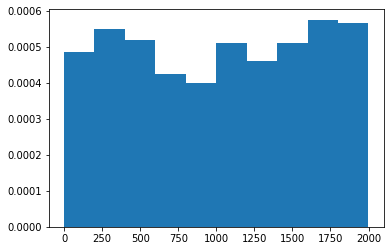

Die mittlere Geschwindigkeit beträgt: 1019.868 m/s
Die absolute mittlere Geschwindigkeit in x-Richtung beträgt durchschnittlich: 651.7975052594699 m/s
Die absolute mittlere Geschwindigkeit in y-Richtung beträgt durchschnittlich: 657.1747861194754 m/s
vx² = 694455.0501451566 m²/s² vy² = 697495.3178548433 m²/s² v² = 1391950.368 m²/s²


In [8]:
simulation.deleteParticles()
simulation.generateParticles(n=1000)
vx = np.array([])
vy = np.array([])
v = np.array([])
for i in simulation.p:
    vx = np.append(vx, i.vx)
    vy = np.append(vy, i.vy)
    v = np.append(v, np.sqrt(i.vx**2+i.vy**2))
    
v_mean = np.mean(v)
vx_mean = np.mean(np.abs(vx))
vy_mean = np.mean(np.abs(vy))
v_squared_mean = np.mean(v**2)
vx_squared_mean = np.mean(vx**2)
vy_squared_mean = np.mean(vy**2)

plt.hist(v,10, density=True)
plt.show()

print(f"Die mittlere Geschwindigkeit beträgt: {v_mean} m/s")
print(f"Die absolute mittlere Geschwindigkeit in x-Richtung beträgt durchschnittlich: {vx_mean} m/s")
print(f"Die absolute mittlere Geschwindigkeit in y-Richtung beträgt durchschnittlich: {vy_mean} m/s")

print(f"vx² = {vx_squared_mean} m²/s²", f"vy² = {vy_squared_mean} m²/s²", f"v² = {v_squared_mean} m²/s²")

Wir erkennen, dass folgende Beziehungen gelten: <br>
$
\begin{align}
    \overline{{v_x}^2} \approx \frac{1}{2} \cdot \overline{v²} \\
    \overline{{v_y}^2} \approx \frac{1}{2} \cdot \overline{v²}
\end {align}
$ <br>
Die Geschwindigkeitsverteilung ist also isotrop.

In [28]:
simulation.deleteParticles()
simulation.addParticle(particle(1,1000*10**-12,1100*10**-12,500,0,100*10**-12))
simulation.addParticle(particle(1,5000*10**-12,1000*10**-12,500,0,100*10**-12))
simulation.initialize()

GridBox(children=(HBox(children=(Button(description='+', style=ButtonStyle()), Button(description='-', style=B…

Canvas(height=300, width=800)